In [ ]:
#Instalação de bibliotecas necessárias

!pip install pycaret

#Precisão do modelo
No código a seguir foram mapeados 10 pontos diferentes dentro de uma sala de 100 $m^2$

In [4]:
#transformação de dados de csv para DataFrame

import pandas as pd

data = []
for i in range(1, 11):
    df = pd.read_csv(f'/content/like_training_{i}.csv')
    df['local'] = i
    data.append(df)

merged_data = pd.concat(data, ignore_index=True)

merged_data

,Geral,local
0,:Inteli-welcome-42FC:5C:45:C0:4F:C8SHOW:Inteli...,1
1,:Inteli-welcome-53FC:5C:45:C0:4F:C8SHOW:Inteli...,1
2,:Inteli-COLLEGE-55FC:5C:45:00:4F:C8SHOW:Inteli...,1
3,:Inteli-COLLEGE-53FC:5C:45:00:4F:C8SHOW:Inteli...,1
4,:Inteli-COLLEGE-53FC:5C:45:00:4F:C8SHOW:Inteli...,1
...,...,...
225,:Inteli-COLLEGE-51FC:5C:45:00:55:18SHOW:Inteli...,10
226,:Inteli-COLLEGE-50FC:5C:45:00:55:18SHOW:Inteli...,10
227,:Inteli-COLLEGE-51FC:5C:45:00:55:18SHOW:Inteli...,10
228,:Inteli-COLLEGE-50FC:5C:45:00:55:18SHOW:Inteli...,10


In [5]:
#Formatação adequada da string recebida no serial do esp32

df = pd.DataFrame()

stringDividida = merged_data.iloc[0]['Geral'].split("SHOW")
for stringSingle in stringDividida:
  for stringSingleInside in stringSingle.split("-"):
    try:
      if isinstance(int(stringSingleInside[0:2]), int):
          df.at[0 ,f'{stringSingleInside[2:]}'] = stringSingleInside[0:2]
    except ValueError:
        pass

for line in range(1, len(merged_data)):
  df_append = pd.DataFrame()

  stringDividida = merged_data.iloc[line]['Geral'].split("SHOW")
  for stringSingle in stringDividida:
    for stringSingleInside in stringSingle.split("-"):
      try:
        if isinstance(int(stringSingleInside[0:2]), int):
          if stringSingleInside[2:] in list(df.columns):
            df_append.at[0 ,f'{stringSingleInside[2:]}'] = stringSingleInside[0:2]
      except ValueError:
          pass

  df = pd.concat([df, df_append], ignore_index=True)
  df = df.fillna(0)

df['local'] = merged_data['local']
df = df.astype(float)
df

,FC:5C:45:C0:4F:C8,FC:5C:45:C0:4F:C9,FC:5C:45:00:4F:C8,FC:5C:45:00:60:98,FC:5C:45:C0:60:98,FC:5C:45:C0:60:99,FC:5C:45:C0:55:18,FC:5C:45:00:55:18,FC:5C:45:00:55:1A,52:57:9C:C0:46:1C,...,FC:5C:45:00:5E:08,FC:5C:45:C0:60:58,FC:5C:45:C0:60:59,FC:5C:45:00:5E:09,FC:5C:45:C0:5E:09,FC:5C:45:00:60:58,FC:5C:45:C0:5C:59,FC:5C:45:00:68:88,FC:5C:45:C0:68:89,local
0,42.0,42.0,43.0,58.0,58.0,58.0,62.0,63.0,63.0,64.0,...,78.0,78.0,78.0,79.0,79.0,79.0,80.0,83.0,84.0,1.0
1,53.0,53.0,53.0,70.0,71.0,70.0,55.0,55.0,55.0,86.0,...,86.0,81.0,81.0,86.0,89.0,81.0,0.0,0.0,0.0,1.0
2,55.0,55.0,55.0,71.0,71.0,71.0,56.0,57.0,57.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53.0,53.0,53.0,69.0,69.0,69.0,58.0,58.0,58.0,0.0,...,0.0,82.0,83.0,0.0,0.0,82.0,0.0,0.0,0.0,1.0
4,54.0,53.0,53.0,71.0,72.0,72.0,56.0,54.0,56.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,52.0,52.0,52.0,64.0,64.0,64.0,51.0,51.0,51.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0,9.0
201,51.0,51.0,51.0,63.0,64.0,63.0,50.0,50.0,50.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,9.0
202,52.0,52.0,52.0,65.0,65.0,65.0,51.0,51.0,51.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
203,53.0,53.0,53.0,66.0,67.0,65.0,51.0,50.0,51.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0,9.0


In [10]:
# Comparação de modelos de classificação
import numpy as np

df2 = df.copy()

for i in list(df.columns):
  df2[f'distance_{i}'] = np.power(10, (df[f'{i}'].iloc[0] - df[f'{i}']) / (10 * 2.4))

df2

,FC:5C:45:C0:4F:C8,FC:5C:45:C0:4F:C9,FC:5C:45:00:4F:C8,FC:5C:45:00:60:98,FC:5C:45:C0:60:98,FC:5C:45:C0:60:99,FC:5C:45:C0:55:18,FC:5C:45:00:55:18,FC:5C:45:00:55:1A,52:57:9C:C0:46:1C,...,distance_FC:5C:45:00:5E:08,distance_FC:5C:45:C0:60:58,distance_FC:5C:45:C0:60:59,distance_FC:5C:45:00:5E:09,distance_FC:5C:45:C0:5E:09,distance_FC:5C:45:00:60:58,distance_FC:5C:45:C0:5C:59,distance_FC:5C:45:00:68:88,distance_FC:5C:45:C0:68:89,distance_local
0,42.0,42.0,43.0,58.0,58.0,58.0,62.0,63.0,63.0,64.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
1,53.0,53.0,53.0,70.0,71.0,70.0,55.0,55.0,55.0,86.0,...,0.464159,0.749894,0.749894,0.510897,0.383119,0.825404,2154.434690,2872.984833,3162.27766,1.000000
2,55.0,55.0,55.0,71.0,71.0,71.0,56.0,57.0,57.0,0.0,...,1778.279410,1778.279410,1778.279410,1957.341781,1957.341781,1957.341781,2154.434690,2872.984833,3162.27766,1.000000
3,53.0,53.0,53.0,69.0,69.0,69.0,58.0,58.0,58.0,0.0,...,1778.279410,0.681292,0.618966,1957.341781,1957.341781,0.749894,2154.434690,2872.984833,3162.27766,1.000000
4,54.0,53.0,53.0,71.0,72.0,72.0,56.0,54.0,56.0,0.0,...,1778.279410,1778.279410,1778.279410,1957.341781,1957.341781,1957.341781,2154.434690,2872.984833,3162.27766,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,52.0,52.0,52.0,64.0,64.0,64.0,51.0,51.0,51.0,67.0,...,1778.279410,1778.279410,1778.279410,1957.341781,1957.341781,1957.341781,2.154435,2872.984833,3162.27766,0.464159
201,51.0,51.0,51.0,63.0,64.0,63.0,50.0,50.0,50.0,77.0,...,1778.279410,1778.279410,1778.279410,1957.341781,1957.341781,1957.341781,1.778279,2872.984833,3162.27766,0.464159
202,52.0,52.0,52.0,65.0,65.0,65.0,51.0,51.0,51.0,73.0,...,1778.279410,1778.279410,1778.279410,1957.341781,1957.341781,1957.341781,2154.434690,2872.984833,3162.27766,0.464159
203,53.0,53.0,53.0,66.0,67.0,65.0,51.0,50.0,51.0,74.0,...,1778.279410,1778.279410,1778.279410,1957.341781,1957.341781,1957.341781,1.957342,2872.984833,3162.27766,0.464159


In [11]:
from pycaret.classification import *
s = setup(df2 , target = 'local', session_id = 123)
best = compare_models()

,Description,Value
0,Session id,123
1,Target,local
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4, 6.0: 5, 7.0: 6, 8.0: 7, 9.0: 8"
4,Original data shape,"(205, 74)"
5,Transformed data shape,"(205, 74)"
6,Transformed train set shape,"(143, 74)"
7,Transformed test set shape,"(62, 74)"
8,Numeric features,73
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9929,1.0000,0.9929,0.9881,0.9900,0.9917,0.9923,0.5620
dt,Decision Tree Classifier,0.9790,0.9887,0.9790,0.9757,0.9744,0.9760,0.9776,0.1640
gbc,Gradient Boosting Classifier,0.9714,0.9978,0.9714,0.9702,0.9686,0.9672,0.9682,3.0080
xgboost,Extreme Gradient Boosting,0.9714,0.9994,0.9714,0.9595,0.9638,0.9672,0.9687,0.4030
rf,Random Forest Classifier,0.9019,0.9915,0.9019,0.8990,0.8853,0.8878,0.8952,0.7160
et,Extra Trees Classifier,0.8805,0.9918,0.8805,0.8935,0.8666,0.8632,0.8704,0.8260
lda,Linear Discriminant Analysis,0.7010,0.9308,0.7010,0.6671,0.6675,0.6599,0.6701,0.1040
nb,Naive Bayes,0.6762,0.8447,0.6762,0.6837,0.6563,0.6309,0.6417,0.0930
ridge,Ridge Classifier,0.5890,0.0000,0.5890,0.6051,0.5716,0.5322,0.5422,0.1400
ada,Ada Boost Classifier,0.4967,0.7991,0.4967,0.3794,0.4019,0.4099,0.5177,0.3530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

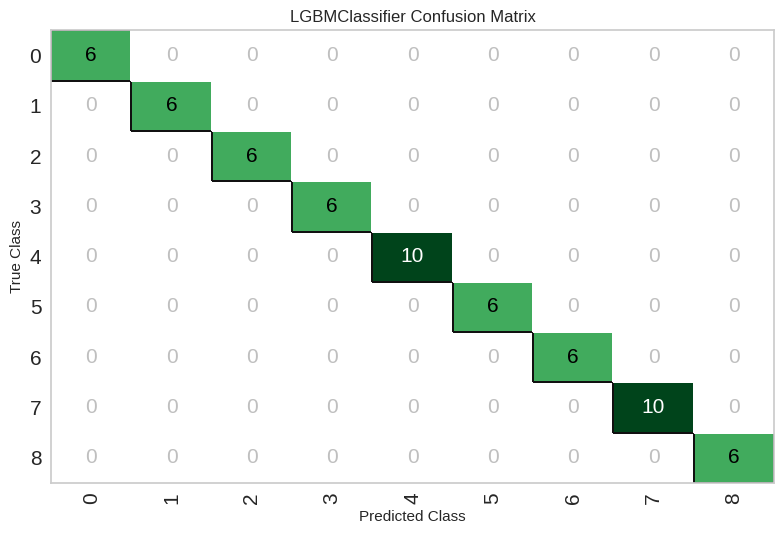

In [12]:
#Matriz de confusão do modelo

plot_model(best, plot = 'confusion_matrix')